In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('mail_data.csv')

In [27]:
df.columns = ['spam', 'message']

In [28]:
df

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [29]:
df.isnull().sum()


spam       0
message    0
dtype: int64

In [30]:
df['spam'].value_counts()

spam
ham     4825
spam     747
Name: count, dtype: int64

In [31]:
df['message'] = df['message'].str.lower()

In [32]:
import re

df['word_count'] = df['message'].str.split(' ').apply(len)
df['letter_count'] = df['message'].apply(lambda x: re.sub('[^\w]', '', x)).apply(len)


In [33]:
df.head()

,spam,message,word_count,letter_count
0,ham,"go until jurong point, crazy.. available only ...",20,83
1,ham,ok lar... joking wif u oni...,6,18
2,spam,free entry in 2 a wkly comp to win fa cup fina...,28,122
3,ham,u dun say so early hor... u c already then say...,11,33
4,ham,"nah i don't think he goes to usf, he lives aro...",13,47


C:\Users\test\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\test\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


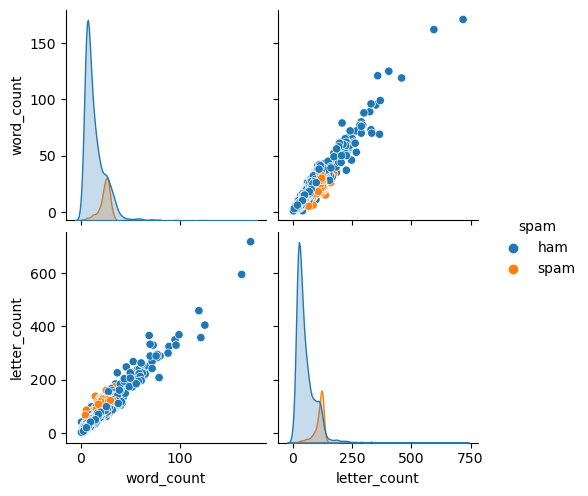

In [34]:
sns.pairplot(df, hue='spam')


In [35]:
import nltk
from nltk.corpus import stopwords

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\test\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
stop_words = set(stopwords.words('english'))


In [38]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\test\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
st = "creating a set of all stop words from the downloaded word dictonary."

In [41]:
n_st = nltk.word_tokenize(st)


In [42]:

clean = [word for word in n_st if word.lower() not in stop_words]

In [43]:
n_st

['creating',
 'a',
 'set',
 'of',
 'all',
 'stop',
 'words',
 'from',
 'the',
 'downloaded',
 'word',
 'dictonary',
 '.']

In [44]:
clean

['creating', 'set', 'stop', 'words', 'downloaded', 'word', 'dictonary', '.']

In [45]:
df['message'] = df['message'].apply(lambda x: re.sub("[^'.,a-z0-9 ]+", " ", x))

In [46]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\test\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\test\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [48]:
lem = WordNetLemmatizer()

In [49]:
[lem.lemmatize(i, pos='v') for i in ['buy', 'bought', 'buying']]


['buy', 'buy', 'buy']

In [50]:
df['message']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will   b going to esplanade fr home 
5569    pity,   was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: message, Length: 5572, dtype: object

In [51]:
df['message'] = df['message'].apply(lambda x: ' '.join([lem.lemmatize(i, pos='v') for i in x.split()]))


In [52]:
df['message']

0       go until jurong point, crazy.. available only ...
1                             ok lar... joke wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he go to usf, he live around...
                              ...                        
5567    this be the 2nd time we have try 2 contact u. ...
5568                       will b go to esplanade fr home
5569    pity, be in mood for that. so...any other sugg...
5570    the guy do some bitch but i act like i'd be in...
5571                           rofl. its true to its name
Name: message, Length: 5572, dtype: object

In [53]:
term_frequency = pd.Series(''.join(df['message']).split()).value_counts()

In [54]:
most_freq_words = term_frequency.head(20)
least_freq_words = term_frequency[term_frequency <= 1]

In [55]:
most_freq_words

be      2314
to      2232
i       1853
you     1817
a       1425
the     1297
u        980
and      945
in       856
have     796
my       719
for      687
get      651
your     650
of       616
call     609
me       596
do       542
go       521
on       515
Name: count, dtype: int64

In [56]:
least_freq_words

per..say         1
sheets.          1
boxi'm           1
seek             1
time.do          1
                ..
birthdayi        1
homeand          1
parachute        1
well...sorry,    1
freerofl.        1
Name: count, Length: 10435, dtype: int64

In [57]:
df['message'] = df['message'].apply(lambda x : ' '.join([word for word in x.split() if word not in most_freq_words]))
df['message'] = df['message'].apply(lambda x : ' '.join([word for word in x.split() if word not in least_freq_words]))

In [58]:

df['message']

0       until available only bugis n great world la e ...
1                                      ok lar... joke wif
2       free entry 2 wkly comp win fa cup final tkts 2...
3                  dun say so early c already then say...
4          don't think he usf, he live around here though
                              ...                        
5567    this 2nd time we try 2 contact u. win 750 poun...
5568                                       will b fr home
5569                   pity, mood that. other suggestions
5570    guy some bitch but act like i'd interest buy s...
5571                              rofl. its true its name
Name: message, Length: 5572, dtype: object

In [59]:
df

,spam,message,word_count,letter_count
0,ham,until available only bugis n great world la e ...,20,83
1,ham,ok lar... joke wif,6,18
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,28,122
3,ham,dun say so early c already then say...,11,33
4,ham,"don't think he usf, he live around here though",13,47
...,...,...,...,...
5567,spam,this 2nd time we try 2 contact u. win 750 poun...,30,122
5568,ham,will b fr home,8,28
5569,ham,"pity, mood that. other suggestions",10,41
5570,ham,guy some bitch but act like i'd interest buy s...,26,99


In [60]:
df.drop(['word_count', 'letter_count'], axis=1, inplace=True)

In [61]:
df['spam'], df['message'] = df['message'], df['spam']
df.columns = ['message', 'spam']

In [62]:
df.head()

,message,spam
0,until available only bugis n great world la e ...,ham
1,ok lar... joke wif,ham
2,free entry 2 wkly comp win fa cup final tkts 2...,spam
3,dun say so early c already then say...,ham
4,"don't think he usf, he live around here though",ham


In [63]:
df = pd.get_dummies(data=df, columns=['spam'], drop_first=True, prefix="", prefix_sep="")


In [64]:
x = df['message']
y = df['spam']

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [67]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [68]:
x_train_cv

<3900x3951 sparse matrix of type '<class 'numpy.int64'>'
	with 37753 stored elements in Compressed Sparse Row format>

In [69]:
x_train_cv

<3900x3951 sparse matrix of type '<class 'numpy.int64'>'
	with 37753 stored elements in Compressed Sparse Row format>

In [70]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [71]:
svm = LinearSVC()
svm.fit(x_train_cv, y_train)

LinearSVC()

In [72]:
y_pred = svm.predict(x_test_cv)

In [73]:
y_pred

array([False, False, False, ..., False,  True, False])

In [74]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,False,True,accuracy,macro avg,weighted avg
precision,0.984343,0.990148,0.985048,0.987245,0.985121
recall,0.998619,0.897321,0.985048,0.947970,0.985048
f1-score,0.991430,0.941452,0.985048,0.966441,0.984734
support,1448.000000,224.000000,0.985048,1672.000000,1672.000000


In [75]:
import pickle
import os
os.makedirs('spam_nlp', exist_ok=True)

In [76]:
pickle.dump(cv, open('spam_nlp/cv.pkl', 'wb'))
pickle.dump(svm, open('spam_nlp/svm.pkl', 'wb'))

In [77]:
cv_input = pickle.load(open('spam_nlp/cv.pkl', 'rb'))
svm_input = pickle.load(open('spam_nlp/svm.pkl', 'rb'))


In [ ]:
import tkinter as tk
from tkinter import messagebox

def check_spam():
    user_text = text_box.get("1.0", tk.END).strip()
    
    if not user_text:
        messagebox.showerror("Error", "You didn't type anything. Enter an email to check.")
        return
    
    text_transformed = cv_input.transform([user_text])
    prediction = svm_input.predict(text_transformed)
    
    if prediction[0] == 1:
        messagebox.showinfo("Result", "Your email is spam.")
    else:
        messagebox.showinfo("Result", "Email is important.")


root = tk.Tk()
root.title("Spam Email Detector")

window_width = 800
window_height = 600
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x = (screen_width // 2) - (window_width // 2)
y = (screen_height // 2) - (window_height // 2)
root.geometry(f"{window_width}x{window_height}+{x}+{y}")

root.configure(bg="#FFFFFF")

heading_label = tk.Label(root, text="Spam Email Detector", font=("Helvetica", 24, "bold"), bg="#FFFFFF", fg="#333333")
heading_label.pack(pady=20)

subheading_label = tk.Label(root, text="Enter the email you want to check:", font=("Arial", 16), bg="#FFFFFF", fg="#555555")
subheading_label.pack()

text_box = tk.Text(root, height=10, width=80, font=("Arial", 12), highlightthickness=1, highlightbackground="#CCCCCC")
text_box.pack(pady=10)

def on_enter(e):
    check_button.config(bg="#55c57a", fg="#FFFFFF")

def on_leave(e):
    check_button.config(bg="#4CAF50", fg="#FFFFFF")

check_button = tk.Button(root, text="Check", command=check_spam, font=("Arial", 14), bg="#4CAF50", fg="#FFFFFF", padx=20, pady=10, borderwidth=0)
check_button.pack(pady=20)
check_button.bind("<Enter>", on_enter)
check_button.bind("<Leave>", on_leave)

root.mainloop()
